

> # **British** **Airways** **Reviews** **Analysis** **To** **Gain** **Company** **Insights**


In [1]:
# importing the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
from nltk.corpus import stopwords
import requests
from bs4 import BeautifulSoup

 ##  `Web` `scraping`  `data` `from` `Skytrax`

In [2]:
# Collecting the data from skytrax webpage with the help of BeautifulSoup (WEB-SCRAPING)
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100 

# Creating empty list to append the values in it 
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
rating = []
category = []
df = pd.DataFrame()

# for loop to get the data from the pages through iteration 
for i in range(1, pages + 1):
  
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df.sample(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Aircraft,reviews
733,Solo Leisure,Economy Class,Berlin to Johannesburg via London,March 2018,3.0,3.0,4.0,4,yes,2.0,3.0,NaN,A380 / A319,✅ Trip Verified | \r\nBerlin to Johannesburg ...
1533,Solo Leisure,Economy Class,London to Las Vegas,March 2017,1.0,1.0,3.0,1,no,2.0,3.0,1.0,NaN,✅ Verified Review | London Heathrow to Las Ve...
648,Business,Business Class,Faro to Heathrow,May 2019,3.0,4.0,1.0,2,no,4.0,NaN,NaN,A320,✅ Trip Verified | Faro to Heathrow. Flight wa...
776,Couple Leisure,First Class,Gatwick to Barbados,December 2018,2.0,5.0,3.0,3,no,2.0,2.0,NaN,Boeing 777-200,✅ Trip Verified | Gatwick to Barbados. We fle...
2665,Business,Business Class,Buenos Aires to Heathrow,July 2014,5.0,5.0,4.0,3,yes,4.0,5.0,NaN,777,Very good flight in Club World from start to f...


In [4]:
# Saving the data into csv file 
df.to_csv("BA_reviews_malik.csv", index=False)

In [5]:
# Loading the dataset
data = pd.read_csv('BA_reviews_malik.csv')
data.head() 

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Aircraft,reviews
0,Solo Leisure,Economy Class,Gatwick to Dublin,January 2023,3.0,5.0,1.0,1,no,NaN,NaN,NaN,NaN,✅ Trip Verified | Being a silver flyer and bo...
1,Solo Leisure,Premium Economy,London Heathrow to Athens Greece,April 2022,3.0,4.0,3.0,1,no,1.0,1.0,1.0,NaN,Not Verified | I find BA incredibly tacky and...
2,Family Leisure,Economy Class,Atlanta to London,January 2023,1.0,1.0,1.0,2,no,1.0,3.0,NaN,Boeing 777-200,✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
3,Family Leisure,Economy Class,London to Chicago,December 2022,3.0,2.0,3.0,2,no,3.0,4.0,NaN,A380,Not Verified | Great thing about British Airw...
4,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1.0,5.0,1.0,1,no,1.0,1.0,NaN,NaN,Not Verified | The staff are friendly. The pla...


 ## `Data` `Cleaning` 

In [6]:
# will create the new column "Verified" 
data['Verified']= data.reviews.str.contains('Trip Verified')
data['Verified'].head()

0     True
1    False
2     True
3    False
4    False
Name: Verified, dtype: bool

In [7]:
# clean review column to remove "verified"
data["reviews"] = data["reviews"].apply(lambda x: x.replace("✅ Trip Verified | ", ""))

# clean review column to remove "not verified"
data["reviews"] = data["reviews"].apply(lambda x: x.replace("Not Verified | ", ""))

# clean reviews
data["reviews"] = data["reviews"].apply(lambda x: x.replace(")(,.`| ", ""))

In [8]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
data['reviews'] = data['reviews'].apply(clean)

data.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Wifi & Connectivity,Aircraft,reviews,Verified
0,Solo Leisure,Economy Class,Gatwick to Dublin,January 2023,3.0,5.0,1.0,1,no,NaN,NaN,NaN,NaN,Being a silver flyer and booking a flight thr...,True
1,Solo Leisure,Premium Economy,London Heathrow to Athens Greece,April 2022,3.0,4.0,3.0,1,no,1.0,1.0,1.0,NaN,I find BA incredibly tacky and constantly loo...,False
2,Family Leisure,Economy Class,Atlanta to London,January 2023,1.0,1.0,1.0,2,no,1.0,3.0,NaN,Boeing 777-200,Flew ATL to LHR th Jan Was unlucky enough to ...,True
3,Family Leisure,Economy Class,London to Chicago,December 2022,3.0,2.0,3.0,2,no,3.0,4.0,NaN,A380,Great thing about British Airways A is the ec...,False
4,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1.0,5.0,1.0,1,no,1.0,1.0,NaN,NaN,The staff are friendly The plane was cold we w...,False


In [9]:
# Shape of the data
data.shape

(3456, 15)

In [10]:
# Info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Type Of Traveller       2686 non-null   object 
 1   Seat Type               3454 non-null   object 
 2   Route                   2682 non-null   object 
 3   Date Flown              2678 non-null   object 
 4   Seat Comfort            3357 non-null   float64
 5   Cabin Staff Service     3349 non-null   float64
 6   Ground Service          2619 non-null   float64
 7   Value For Money         3456 non-null   int64  
 8   Recommended             3456 non-null   object 
 9   Food & Beverages        3121 non-null   float64
 10  Inflight Entertainment  2432 non-null   float64
 11  Wifi & Connectivity     512 non-null    float64
 12  Aircraft                1807 non-null   object 
 13  reviews                 3456 non-null   object 
 14  Verified                3456 non-null   

In [11]:
# Printing missing values in percentage 
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column_name': data.columns,
                                 'Percent_missing': percent_missing})
missing_value_df.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Wifi & Connectivity,85.185185
Aircraft,47.714120
Inflight Entertainment,29.629630
Ground Service,24.218750
Date Flown,22.511574
Route,22.395833
Type Of Traveller,22.280093
Food & Beverages,9.693287
Cabin Staff Service,3.096065
Seat Comfort,2.864583


In [12]:
# will drop the row's with nan values of  "Aircraft", "Route", "Date Flown" column 
# We cannot delete the hole "Aircraft" column because the information is important to analyze
# for "Rout" & "Date Flown " the missing data is very small hence the columns are droped 
data = data.dropna(subset=['Aircraft','Route','Date Flown'])

In [13]:
# new shape of the data 
data.shape

(1800, 15)

In [14]:
data[['Aircraft','Route','Date Flown']].isnull().sum()            #checking for null value

Aircraft      0
Route         0
Date Flown    0
dtype: int64

In [15]:
# Printing missing values in percentage 
percent_missing2 = data.isnull().sum() * 100 / len(data)
missing_value_df2 = pd.DataFrame({'Column_name': data.columns,
                                 'Percent_missing': percent_missing2})
missing_value_df2.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Wifi & Connectivity,82.000000
Inflight Entertainment,32.888889
Food & Beverages,6.000000
Seat Comfort,0.666667
Cabin Staff Service,0.666667
Ground Service,0.444444
Type Of Traveller,0.000000
Seat Type,0.000000
Route,0.000000
Date Flown,0.000000


In [16]:
# will drop the "Wifi & Connectivity" column because 82% of data is missing 
data = data.drop('Wifi & Connectivity',axis=1)

In [17]:
data.columns

Index(['Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Ground Service', 'Value For Money',
       'Recommended', 'Food & Beverages', 'Inflight Entertainment', 'Aircraft',
       'reviews', 'Verified'],
      dtype='object')

In [18]:
# statistic of "Inflight Entertainment"
data['Inflight Entertainment'].describe()

count    1208.000000
mean        2.750000
std         1.369722
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Inflight Entertainment, dtype: float64

In [19]:
# will fill the nan value of Dataset with mean()
data['Inflight Entertainment'] = data['Inflight Entertainment'].fillna(data['Inflight Entertainment'].mean())
data['Food & Beverages'] = data['Food & Beverages'].fillna(data['Food & Beverages'].mean())
data['Ground Service'] = data['Ground Service'].fillna(data['Ground Service'].mean())
data['Seat Comfort'] = data['Seat Comfort'].fillna(data['Seat Comfort'].mean())
data['Cabin Staff Service'] = data['Cabin Staff Service'].fillna(data['Cabin Staff Service'].mean())

In [20]:
# verifiying the result 
# Printing missing values in percentage 
percent_missing3 = data.isnull().sum() * 100 / len(data)
missing_value_df3 = pd.DataFrame({'Column_name': data.columns,
                                 'Percent_missing': percent_missing3})
missing_value_df3.sort_values('Percent_missing',ascending=False).drop('Column_name',axis=1)

,Percent_missing
Type Of Traveller,0.0
Seat Type,0.0
Route,0.0
Date Flown,0.0
Seat Comfort,0.0
Cabin Staff Service,0.0
Ground Service,0.0
Value For Money,0.0
Recommended,0.0
Food & Beverages,0.0


In [21]:
data.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Aircraft,reviews,Verified
2,Family Leisure,Economy Class,Atlanta to London,January 2023,1.0,1.0,1.0,2,no,1.0,3.00,Boeing 777-200,Flew ATL to LHR th Jan Was unlucky enough to ...,True
3,Family Leisure,Economy Class,London to Chicago,December 2022,3.0,2.0,3.0,2,no,3.0,4.00,A380,Great thing about British Airways A is the ec...,False
5,Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1.0,2.0,1.0,1,no,1.0,1.00,"A320, A380",Probably the worst business class experience I...,True
7,Business,Economy Class,London to Belfast,January 2023,4.0,5.0,5.0,4,yes,3.0,2.75,A321,BA shuttle service across the UK is still sur...,True
8,Business,Economy Class,Doha to London,December 2022,5.0,3.0,5.0,4,no,1.0,1.00,A380,I must admit like many others I tend to avoid ...,True


In [22]:
# converting date column from "object" to "datetime"
data['Date Flown'] = pd.to_datetime(data['Date Flown']).dt.strftime('%Y-%m')

In [23]:
data['Date Flown'].values.astype('datetime64[M]')

array(['2023-01', '2022-12', '2023-01', ..., '2015-06', '2015-06',
       '2015-05'], dtype='datetime64[M]')

In [24]:
data.head(2)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Aircraft,reviews,Verified
2,Family Leisure,Economy Class,Atlanta to London,2023-01,1.0,1.0,1.0,2,no,1.0,3.0,Boeing 777-200,Flew ATL to LHR th Jan Was unlucky enough to ...,True
3,Family Leisure,Economy Class,London to Chicago,2022-12,3.0,2.0,3.0,2,no,3.0,4.0,A380,Great thing about British Airways A is the ec...,False


# **`Data`** **`Visualization`** 

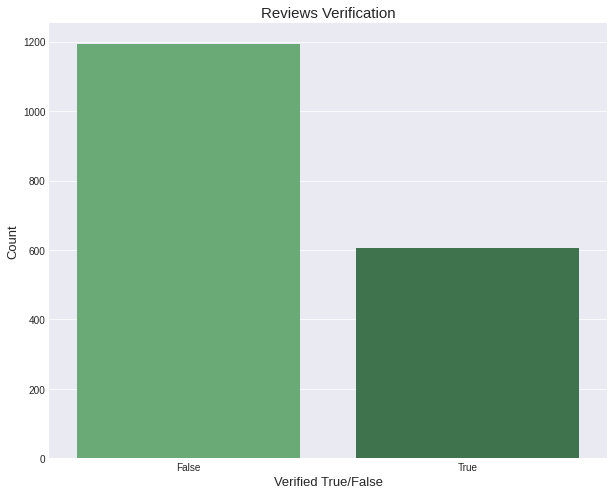

In [25]:
# Verified reviews and reviews which are not Verified
plt.figure(figsize=(10,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(x='Verified',data=data ,palette='Greens_d')
plt.title('Reviews Verification', fontsize=15)
plt.xlabel('Verified True/False', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.show()

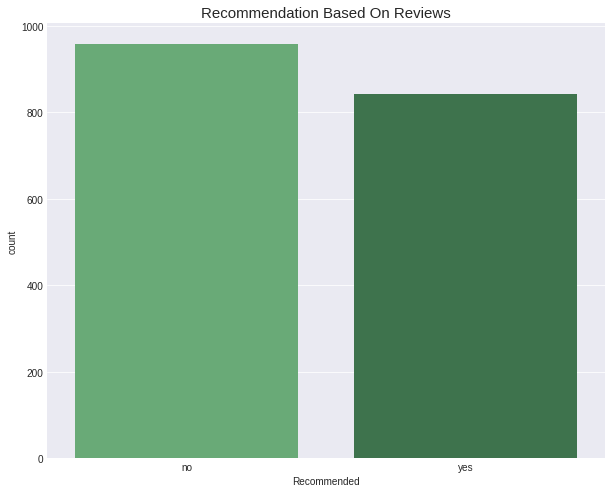

In [26]:
# # Visualaization of "Recommended" data
plt.figure(figsize=(10,8))
sns.countplot(x='Recommended',data=data ,palette='Greens_d')
plt.title('Recommendation Based On Reviews', fontsize=15)
plt.show()

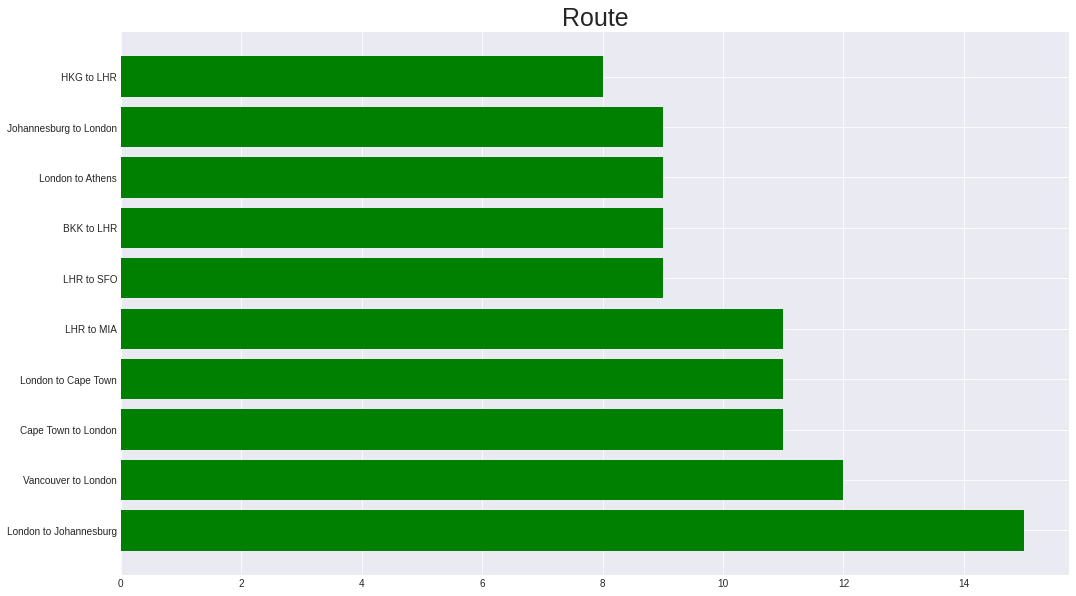

In [27]:
# Top 10 Rout
plt.figure(figsize=(17,10))
index4 = data['Route'].value_counts().index[0:10]
values4 = data['Route'].value_counts().values[0:10]
plt.barh(index4, values4, label='Route', color='Green')
plt.title('Route', fontsize=25)
plt.show()

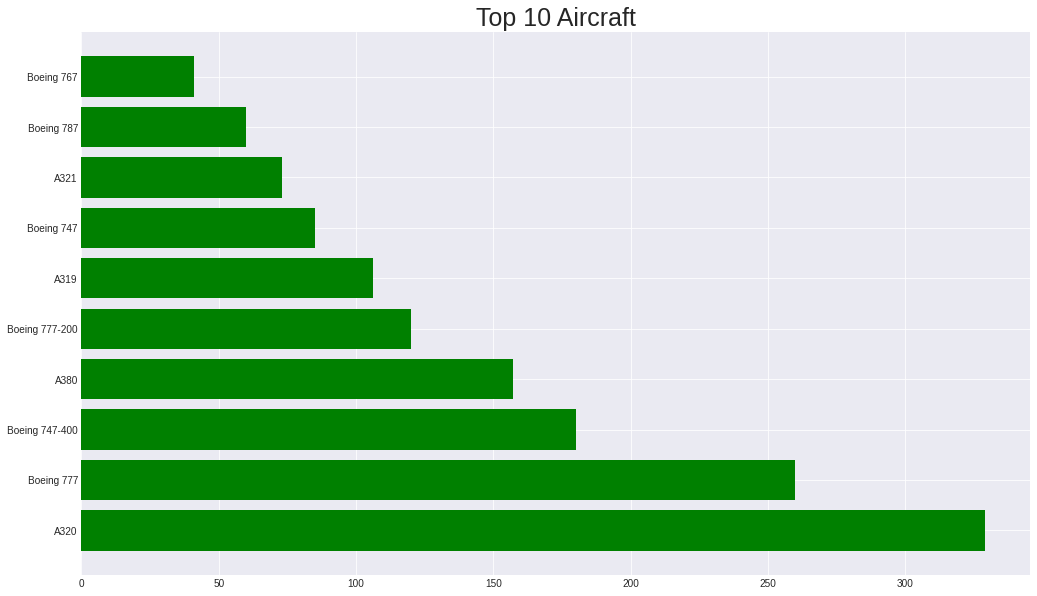

In [28]:
# Top 10 Aircraft
plt.figure(figsize=(17,10))
index = data['Aircraft'].value_counts().index[0:10]
values = data['Aircraft'].value_counts().values[0:10]
plt.barh(index, values, label='Aircraft', color='Green')
plt.title('Top 10 Aircraft', fontsize=25)
plt.show()

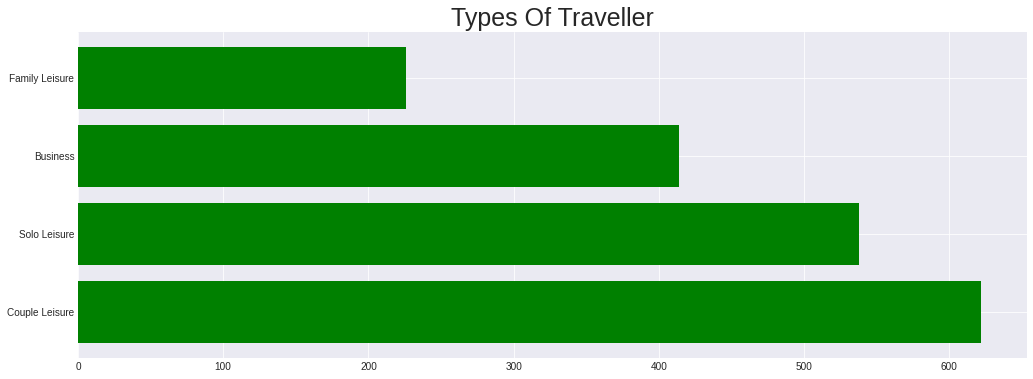

In [29]:
# Type Of Traveller
plt.figure(figsize=(17,6))
index2 = data['Type Of Traveller'].value_counts().index
values2 = data['Type Of Traveller'].value_counts().values
plt.barh(index2, values2, label='Type Of Traveller', color='Green')
plt.title('Types Of Traveller', fontsize=25)
plt.show()

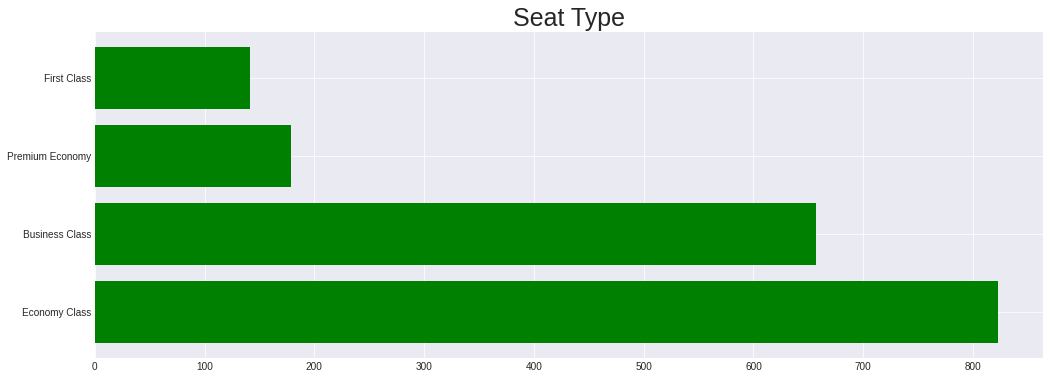

In [30]:
# Seat Type
plt.figure(figsize=(17,6))
index3 = data['Seat Type'].value_counts().index
values3 = data['Seat Type'].value_counts().values
plt.barh(index3, values3, label='Seat Type', color='Green')
plt.title('Seat Type', fontsize=25)
plt.show()

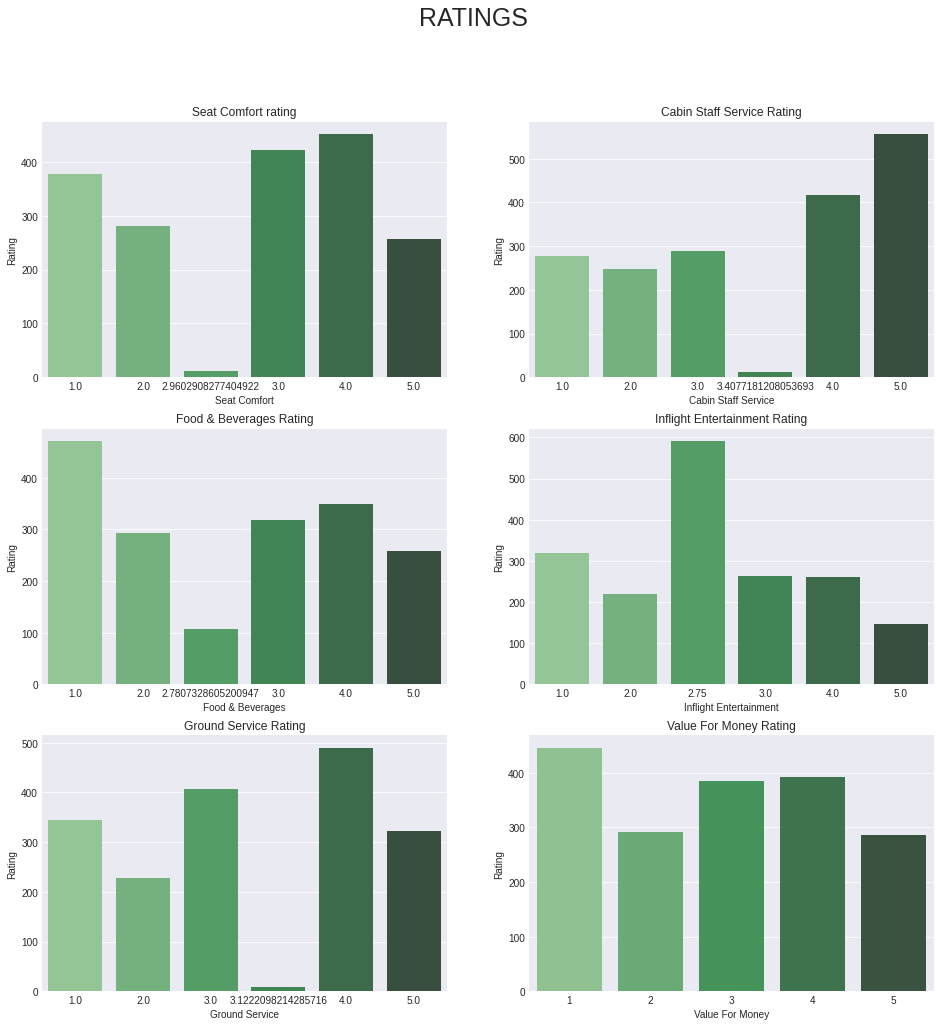

In [31]:
plt.figure(figsize=(16,16))

# seat comfort rating
plt.subplot(3,2,1)
sns.countplot(x='Seat Comfort',data=data , palette='Greens_d')
plt.ylabel('Rating')
plt.title('Seat Comfort rating')

# cabin staff service rating
plt.subplot(3,2,2)
sns.countplot(x='Cabin Staff Service',data=data , palette='Greens_d')
plt.ylabel('Rating')
plt.title('Cabin Staff Service Rating')

# Food & Beverages rating
plt.subplot(3,2,3)
sns.countplot(x='Food & Beverages',data=data , palette='Greens_d')
plt.ylabel('Rating')
plt.title('Food & Beverages Rating')

# Inflight Entertainment rating
plt.subplot(3,2,4)
sns.countplot(x='Inflight Entertainment',data=data , palette='Greens_d')
plt.ylabel('Rating')
plt.title('Inflight Entertainment Rating')

# Ground service rating
plt.subplot(3,2,5)
sns.countplot(x='Ground Service',data=data , palette='Greens_d')
plt.ylabel('Rating')
plt.title('Ground Service Rating')

# Value for money rating
plt.subplot(3,2,6)
sns.countplot(x='Value For Money',data=data , palette='Greens_d')
plt.ylabel('Rating')
plt.title('Value For Money Rating')
plt.suptitle('RATINGS',fontsize=25)
plt.show()

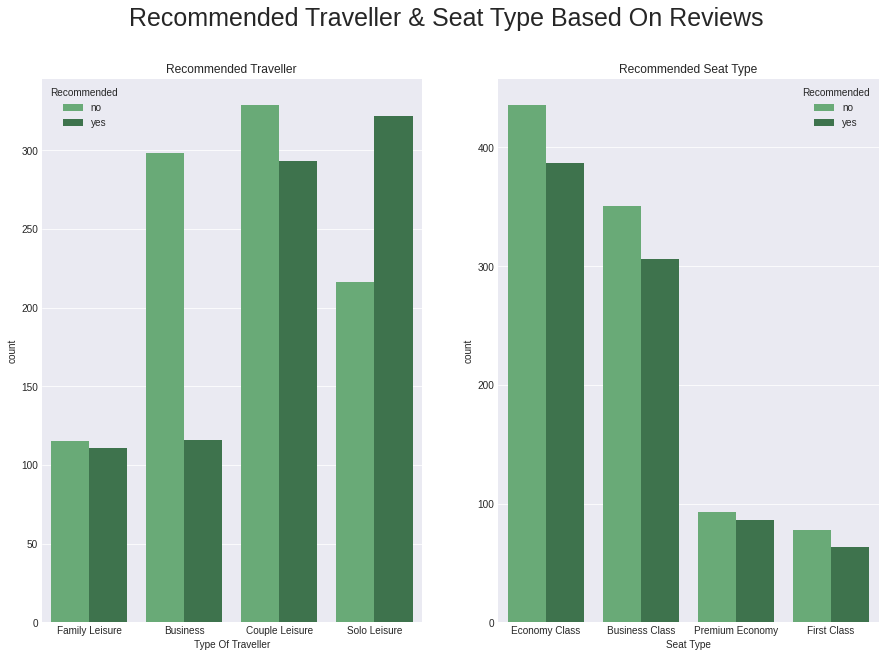

In [32]:
plt.figure(figsize=(15,10))

# Types of Traveller Recommend 
plt.subplot(1,2,1)
sns.countplot(x='Type Of Traveller',data=data, hue='Recommended', palette='Greens_d')
plt.title('Recommended Traveller')

# Seat Type Recommend
plt.subplot(1,2,2)
sns.countplot(x='Seat Type',data=data , hue='Recommended', palette='Greens_d')
plt.title('Recommended Seat Type')
plt.suptitle('Recommended Traveller & Seat Type Based On Reviews',fontsize=25)
plt.show()

In [33]:
 # Getting the mean rating  for every rating data
 seat_comfort = data['Seat Comfort'].mean()
 cabin_staff = data['Cabin Staff Service'].mean()
 food_beverages = data['Food & Beverages'].mean()
 inflight_entertainment = data['Inflight Entertainment'].mean()
 ground_service = data['Ground Service'].mean()
 value_money = data['Value For Money'].mean()
 Ratings= [seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,value_money]
 Ratings=pd.DataFrame(Ratings,index=['Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment','Ground Service','Value For Money'],
                      columns=['ratings'])
 Ratings

,ratings
Seat Comfort,2.960291
Cabin Staff Service,3.407718
Food & Beverages,2.780733
Inflight Entertainment,2.750000
Ground Service,3.122210
Value For Money,2.878333


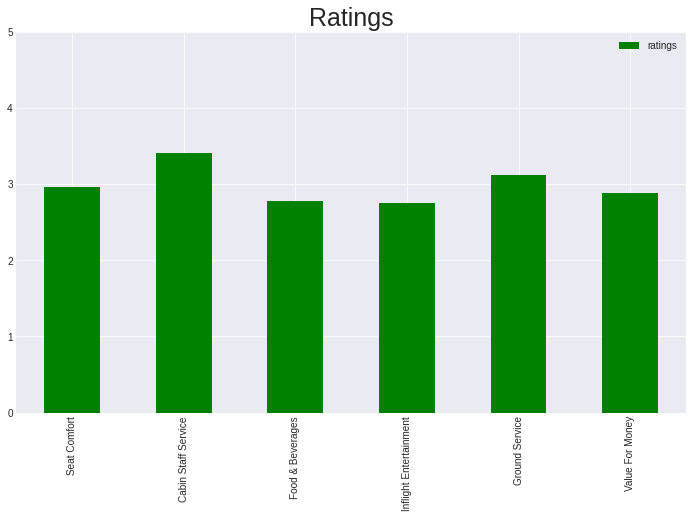

In [34]:
# Overall Ratings 
Ratings.plot(kind='bar',color='Green',figsize=(12,7))
plt.title('Ratings', fontsize=25)
plt.ylim(0,5)
plt.show()

# Insights From  Data Visualaization
Around 55% of customer are not recommending the service. therefor we need to improve that number 
### Area's that need to be improved based on reviews rating 


1.   Seat Comfort
2.   Food and Beverages 
3.   Inflight Entertainmen
4.   Traveller (Business & Couple Leisure)
5.   Seat Type (Economy class & Business class)



In [35]:
 data.head(2)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Aircraft,reviews,Verified
2,Family Leisure,Economy Class,Atlanta to London,2023-01,1.0,1.0,1.0,2,no,1.0,3.0,Boeing 777-200,Flew ATL to LHR th Jan Was unlucky enough to ...,True
3,Family Leisure,Economy Class,London to Chicago,2022-12,3.0,2.0,3.0,2,no,3.0,4.0,A380,Great thing about British Airways A is the ec...,False


## **`WORDCLOUD`** 

In [36]:
# Importing & Downloading  the required tools for NLP
from nltk.corpus import wordnet as wn
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

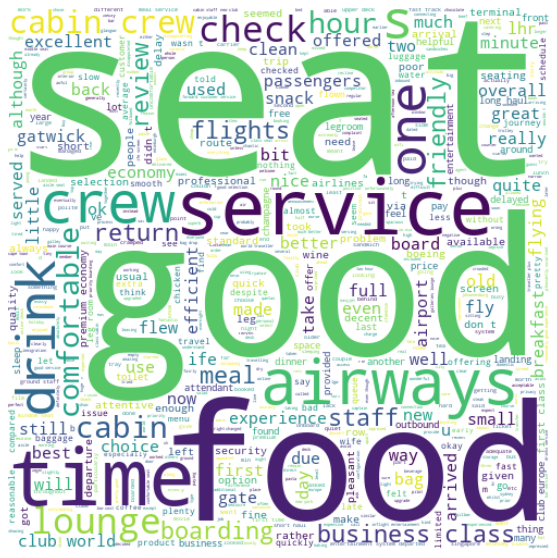

In [37]:
# generate a word cloud only for Positive reviews
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# update stopwords
stopwords.update(['ba', 'flight', 'british', 'airway', 'airline', 'plane', 'passenger',
                 'london', 'heathrow', 'aircraft', 'verified'])


# join the corpus
good_reviews =  ' '.join(data[data['Value For Money']>=2.5]['reviews'])
# lower case the words 
good_reviews = good_reviews.lower()
# removing puncuation
good_reviews = re.sub('[^a-zA-Z0-9]',' ',good_reviews) 
wordcloud = WordCloud(height=500, width=500, background_color='white', stopwords=stopwords,
                      max_words=1000, max_font_size=250, random_state=42).generate(good_reviews)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

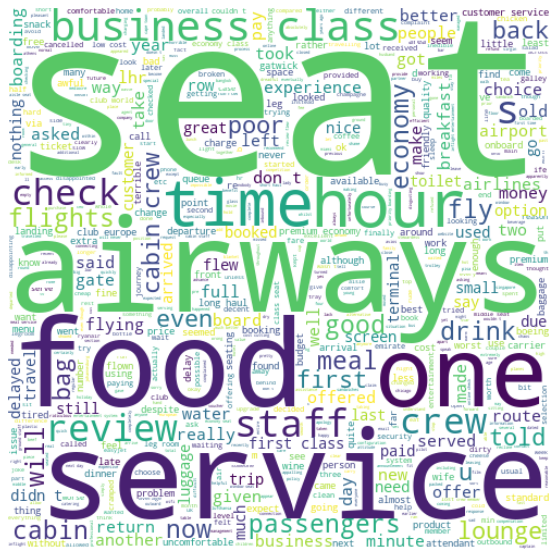

In [38]:
# generate a word cloud only for Negative reviews
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# update stopwords
stopwords.update(['ba', 'flight', 'british', 'airway', 'airline', 'plane', 'passenger',
                 'london', 'heathrow', 'aircraft', 'verified'])


# join the corpus
bad_reviews =  ' '.join(data[data['Value For Money']<=2.5]['reviews'])
# lower case the words 
bad_reviews = bad_reviews.lower()
# removing puncuation
bad_reviews = re.sub('[^a-zA-Z0-9]',' ',bad_reviews) 
wordcloud = WordCloud(height=500, width=500, background_color='white', stopwords=stopwords,
                      max_words=1000, max_font_size=250, random_state=42).generate(bad_reviews)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **`WORD`** **`FREQUENC`**



In [39]:
#  Word Frequency for good reviews
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = good_reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', 'passenger','u', 'london','airway','british','airline','British','London',\
                                           'heathrow','plane','lhr','review','The','BA','.','`','|','','I',"'",'t','s'])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_good_reviews = pd.Series(dict(nlp_words))

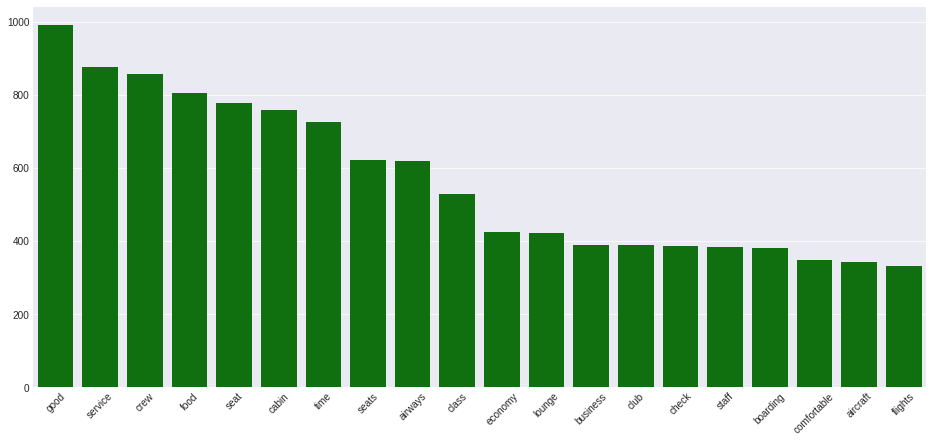

In [40]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(16,7))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_good_reviews.index, y=all_good_reviews.values, color='green' , ax=ax)
plt.xticks(rotation=45)
plt.show()

In [41]:
# Word Frequency for bad reviews
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words_bad = bad_reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', 'passenger','u', 'london','airway','british','airline','British','London',\
                                           'heathrow','plane','lhr','review','The','BA','.','`','|','','I',"'",'t','s'])


new_words_bad = [word for word in words_bad if word not in stopwords]

nlp_words=FreqDist(new_words_bad).most_common(20)

#create a dataframe of these word and its frequencies
all_bad_reviews = pd.Series(dict(nlp_words))

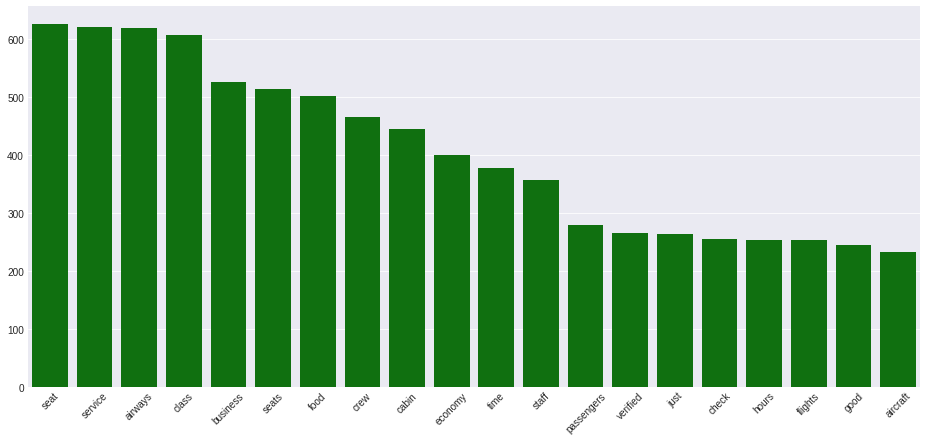

In [42]:
## Setting figure, ax into variables
fig, ax1 = plt.subplots(figsize=(16,7))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_bad_reviews.index, y=all_bad_reviews.values, color='green' , ax=ax1)
plt.xticks(rotation=45)
plt.show()

In [43]:
# trigram words for positive reviews
import nltk.collocations as collocations
from nltk import FreqDist, bigrams


def get_freq_dist(good_reviews,number_of_ngrams ):
    from nltk import ngrams
    
    # Generate bigrams
    ngrams = ngrams(good_reviews, number_of_ngrams)

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


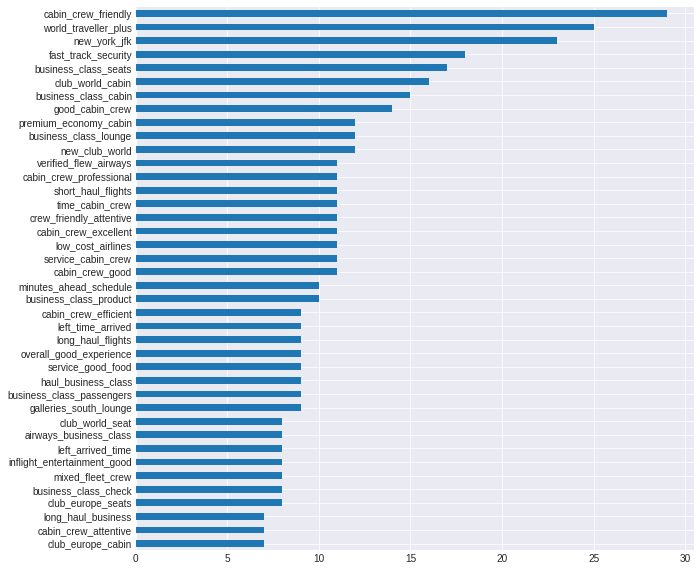

In [44]:
# trigram words
get_freq_dist(new_words,3)
plt.show()

In [45]:
# trigram words for negative reviews
import nltk.collocations as collocations
from nltk import FreqDist, bigrams


def get_freq_dist(bad_reviews,number_of_ngrams ):
    from nltk import ngrams
    
    # Generate bigrams
    ngrams = ngrams(bad_reviews, number_of_ngrams)

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax3 = ngram_freqdist.plot(kind="barh")
    
    return ax3

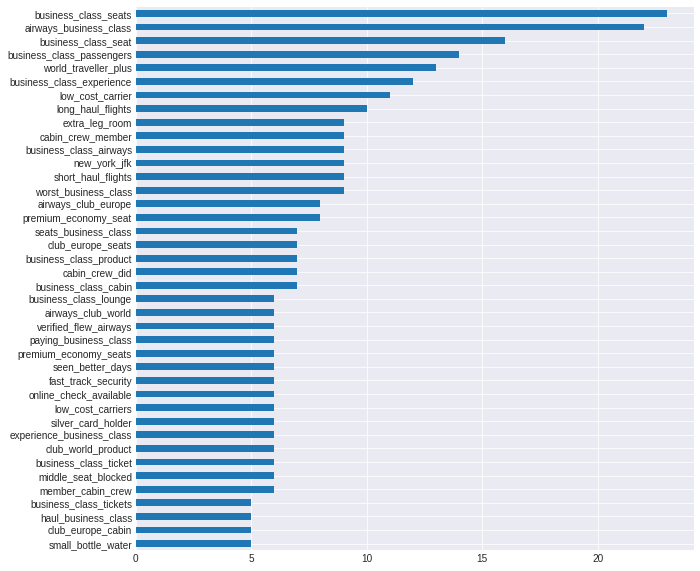

In [46]:
# trigram words 
get_freq_dist(new_words_bad,3)
plt.show()

# `Sentiment` `Analysis`

In [47]:
data['reviews']

2        Flew ATL to LHR th Jan Was unlucky enough to ...
3        Great thing about British Airways A is the ec...
5       Probably the worst business class experience I...
7        BA shuttle service across the UK is still sur...
8       I must admit like many others I tend to avoid ...
                              ...                        
2674    Terrible Flight time is well over hours Seatin...
2675     th May LHR DEN B Seat A Paid extra for Legroo...
2676     ORD LHR Club World Seat b Had booked as World...
2677     LHR GLA A Seat A Was able to choose this seat...
2678     May GLA LHR A new Seating Seat A Flight was o...
Name: reviews, Length: 1800, dtype: object

In [48]:
# Data preprocessing
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
corpus_reviews =[]
data_clean = data['reviews']
#loop through each review, remove punctuations, small case etc
for rev in data_clean:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus_reviews.append(rev)

In [49]:
data['clean_reviews'] = corpus_reviews

In [50]:
data['clean_reviews']

2       flew atl lhr th jan unlucky enough board year ...
3       great thing british airway economy section ups...
5       probably worst business class experience ever ...
7       ba shuttle service across uk still surprisingl...
8       must admit like many others tend avoid ba long...
                              ...                        
2674    terrible flight time well hour seating like ry...
2675    th may lhr den b seat paid extra legroom seat ...
2676    ord lhr club world seat b booked world travele...
2677    lhr gla seat able choose seat advance plenty l...
2678    may gla lhr new seating seat flight time half ...
Name: clean_reviews, Length: 1800, dtype: object

In [51]:
# Now we will use textblob library to define if the text is negative or positive and to what extent
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
text = data['clean_reviews']
def subjectivity(text): 
    
    return TextBlob(text).sentiment.subjectivity

def polarity(text): 
    
    return TextBlob(text).sentiment.polarity

def getAnalysis(score):
    
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [52]:
# Appending the results to dataframe
data['subjectivity'] = data['clean_reviews'].apply(subjectivity)
data['polarity'] = data['clean_reviews'].apply(polarity)
data['analysis'] = data['polarity'].apply(getAnalysis)

In [53]:
data.head(2)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Ground Service,Value For Money,Recommended,Food & Beverages,Inflight Entertainment,Aircraft,reviews,Verified,clean_reviews,subjectivity,polarity,analysis
2,Family Leisure,Economy Class,Atlanta to London,2023-01,1.0,1.0,1.0,2,no,1.0,3.0,Boeing 777-200,Flew ATL to LHR th Jan Was unlucky enough to ...,True,flew atl lhr th jan unlucky enough board year ...,0.575476,-0.128452,Negative
3,Family Leisure,Economy Class,London to Chicago,2022-12,3.0,2.0,3.0,2,no,3.0,4.0,A380,Great thing about British Airways A is the ec...,False,great thing british airway economy section ups...,0.467837,0.069203,Positive


In [54]:
data.iloc[:,-3:]  # checking the dataframe

,subjectivity,polarity,analysis
2,0.575476,-0.128452,Negative
3,0.467837,0.069203,Positive
5,0.482407,-0.093201,Negative
7,0.472222,0.322222,Positive
8,0.503571,0.130556,Positive
...,...,...,...
2674,1.000000,-0.541667,Negative
2675,0.522222,0.213426,Positive
2676,0.624167,0.214167,Positive
2677,0.618660,0.009370,Positive


In [55]:
# Sentiments of reviews 
pd.DataFrame(data['analysis'].value_counts())

,analysis
Positive,1378
Negative,417
Neutral,5


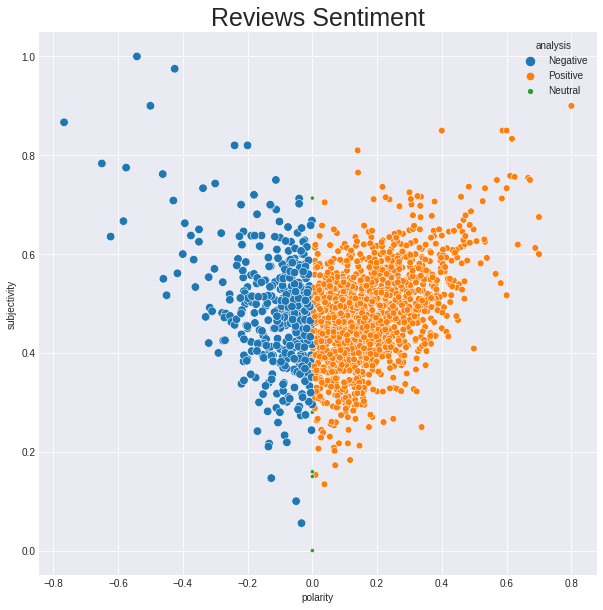

In [56]:
# visualizing the sentiment
plt.figure(figsize=(10,10))
sns.scatterplot(data=data,x='polarity',y='subjectivity', hue='analysis' ,size='analysis')
plt.title('Reviews Sentiment', fontsize=25)
plt.show()

# `Topic` `Modeling` `with` `LDA`

In [57]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(data.clean_reviews).toarray()
tf_feature_names = vect.get_feature_names()

In [58]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [59]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,flight,491.4,ba,156.0,airway,74.6,flight,792.4,seat,314.3,seat,663.8,flight,324.4,flight,468.2,meal,32.7,flight,1007.1
1,service,420.9,flight,118.6,flight,71.9,good,395.5,ba,249.3,flight,308.9,bag,173.4,ba,399.6,one,18.5,seat,669.4
2,ba,399.0,check,89.7,british,69.5,ba,384.1,flight,234.6,ba,254.3,hour,115.9,british,278.8,choice,17.6,crew,528.5
3,food,341.7,passenger,84.3,ba,60.2,time,325.2,class,191.3,get,145.1,ba,96.9,airway,268.5,chicken,16.8,cabin,492.4
4,good,332.2,boarding,78.2,one,59.6,service,323.3,business,182.4,would,138.2,check,69.3,service,226.8,main,11.9,ba,393.4
5,seat,327.9,hour,77.0,meal,52.1,lounge,319.3,economy,174.2,class,137.7,told,69.2,seat,222.5,cabin,11.4,british,373.3
6,club,305.6,class,73.3,food,49.8,crew,243.9,airline,174.0,business,133.7,cancelled,67.4,airline,213.0,london,10.6,airway,371.1
7,crew,289.2,seat,69.2,airline,44.8,seat,235.4,airway,129.9,hour,125.1,london,66.1,london,200.3,potato,10.2,food,357.0
8,class,271.1,staff,68.0,review,42.1,food,229.0,british,124.5,row,120.9,airport,61.4,time,171.8,passenger,10.0,london,331.2
9,cabin,251.9,plane,64.0,london,41.7,london,204.8,london,106.6,airway,120.3,day,59.9,food,165.0,run,9.6,good,327.0
